ModSim Project 2

In [15]:
%matplotlib inline

from modsim import *

from ipywidgets import widgets
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets



In [16]:
def f(x):
    print(x)
interact(f, x=10)


<function __main__.f>

In [17]:
init = State(BAC=0)
person = System(init = init, t0=0, t_end=12, 
                gender = .73, 
                weight = 160, 
                drink = 12.5,
                percent = .05, drinking_time = .5, dt = 1)
#time in hours
# dt is time step
#1 drink =.6oz

In [18]:
def run_simulation(state, system):
    unpack(system)
    #alc = drink*percent
    alc = 6*.6
    
    frame = TimeFrame(columns = init.index)
    frame.loc[t0] = init
    ts = linrange(t0, t_end-dt, dt)
    
    BAC = state.BAC

    
    for t in ts:
        
        if t < drinking_time:
            #drinking phase
            BAC += ((alc/(gender*weight*(drinking_time)))-((.2*BAC)/(BAC+1))) *(dt)
            frame.loc[t+dt] = BAC

            
        else:
            #recovery phase
            BAC += (-((.2*BAC)/(BAC+1))) * (dt)
            frame.loc[t+dt] = BAC

            
        system.results = frame
        """
    for t in ts:
        
        #drinking phase
        BAC += ((alc/(gender*weight*(drinking_time)))-((.2*BAC)/(BAC+1))) *(dt)
            
        frame.loc[t+dt] = BAC

"""
            
    
    


In [19]:
run_simulation(init, person)
person.results.BAC

0     0.000000
1     0.061644
2     0.050031
3     0.040502
4     0.032717
5     0.026381
6     0.021240
7     0.017080
8     0.013722
9     0.011014
10    0.008836
11    0.007084
12    0.005677
Name: BAC, dtype: float64

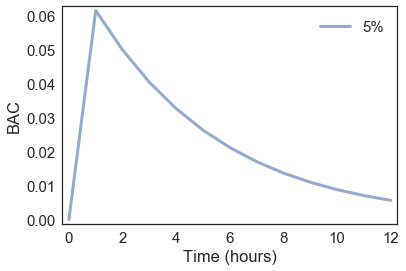

In [20]:
newfig()
plot(person.results.BAC, label='5%')
decorate(xlabel='Time (hours)',
         ylabel='BAC')

In [21]:
#plt.getp(plt.gca())

In [22]:
def run_simulation_sweep(state, system, alc):
    unpack(system)
    #alc = drink*percent
    alc = alc
    
    frame = TimeFrame(columns = init.index)
    frame.loc[t0] = init
    ts = linrange(t0, t_end-dt, dt)
    
    BAC = state.BAC

    
    for t in ts:
        
        if t < drinking_time:
            #drinking phase
            BAC += ((alc/(gender*weight*(drinking_time)))-((.2*BAC)/(BAC+1))) *(dt)
            frame.loc[t+dt] = BAC

            
        else:
            #recovery phase
            BAC += (-((.2*BAC)/(BAC+1))) * (dt)
            frame.loc[t+dt] = BAC

            
        system.results = frame


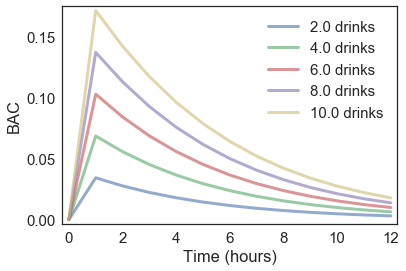

In [23]:
BAC_array = linrange(2,10,2)
newfig()

for BAC in BAC_array:
    run_simulation_sweep(init, person, BAC)
    plot(person.results.BAC, label= str(BAC) + ' drinks')
    decorate(xlabel='Time (hours)',
         ylabel='BAC')


In [24]:
#bac highly dependent on drinking_time, move around to get accurate 'drinks' to BAC value
#use smaller time step for more accurate results

In [27]:
#https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/

#newfig()
t=linrange(1,10,1)
def slider(f):
    run_simulation_sweep(init, person, f)
    plot(person.results.BAC)
    plt.show()
    
interact(slider, f=(2,10,2))
decorate(ylim[0, 0.2])


TypeError: 'function' object is not subscriptable